# Understanding Crystal class

This tutorial will guide you through using the `Crystal` class to simulate and analyze nonlinear optical processes, specifically second harmonic generation (SHG) and spontaneous parametric down-conversion (SPDC). We'll cover initializing the crystal for different processes, exploring medium properties, and understanding different configuration options.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ParaTune.media.Crystal import Crystal

## 1. Nonlinear Process Initialization
There are two options for the nonlinear interaction : **Spontaneous parametric down conversion** (SPDC) or **Second harmonic generatio** (SHG).

Defining the interaction parameter as either SHG or SPDC is crucial for specifying the nonlinear interaction, ensuring the correct phase matching function is used to describe momentum conservation and optimize process efficiency.

### SHG Process

For the SHG process, we initialize a crystal with specific parameters for the fundamental and second harmonic fields.

In [2]:
# General crystal parameters for SHG
config = 'normal'
medium = 'KTP'
length = 5e-3  # Crystal length in meters
nz = 20000  # Number of grid points along z
interaction = 'shg'
fundamental = 'y'  # Polarization of fundamental wave
second_harmonic = 'x'  # Polarization of second harmonic wave

# Initialize the crystal for SHG
crystal_shg = Crystal(config, medium, nz, interaction,
                      1064e-9,  # Central wavelength for SHG process
                      fundamental=fundamental,
                      second_harmonic=second_harmonic, length=length)

# Compute the nonlinear profile for SHG
parameters_shg = np.array(crystal_shg.poling_function(np.array(crystal_shg.domain_values)), dtype=np.float32)[:len(crystal_shg.z)]


I0000 00:00:1709014923.852454       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


domain_width/2 = 4.289871e-06
domain_width/5 = 1.7159484e-06
dictretization step along z = 2.5e-07


### SPDC Process

For the SPDC process, the crystal is initialized with parameters corresponding to the signal, idler, and pump fields.

In [3]:
# General crystal parameters for SPDC
interaction = 'spdc'
medium = 'LiNbO3'
signal = 'x'  # Polarization of the signal wave
idler = 'y'  # Polarization of the idler wave
pump = 'y'  # Polarization of the pump wave

# Initialize the crystal for SPDC
crystal_spdc = Crystal(config, medium, nz, interaction, 1064e-9,
                       signal=signal, idler=idler, pump=pump, length=length)

# Compute the nonlinear profile for SPDC
parameters_spdc = np.array(crystal_spdc.poling_function(np.array(crystal_spdc.domain_values)), dtype=np.float32)[:len(crystal_shg.z)]


domain_width/2 = 0.0001684139
domain_width/5 = 6.736556e-05
dictretization step along z = 2.5e-07


### Plotting The Phase Matching function

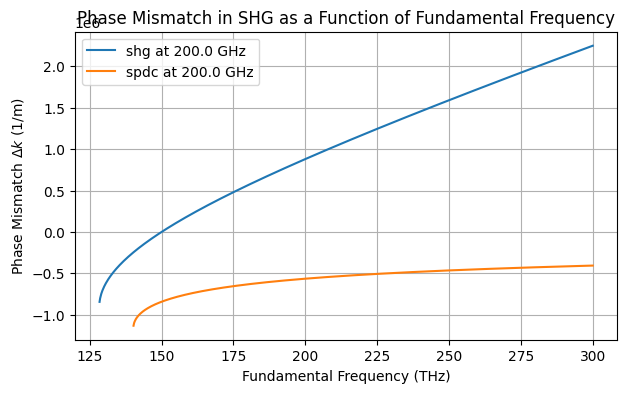

In [4]:
# Frequency range for the fundamental wave
omega1 =  np.linspace(1e14, 3e14, 1000) # Fundamental frequency range (Hz) 
omega2 = 2e14  # Second harmonic frequency range (Hz)
phase_mismatch_shg = crystal_shg.wavevector_mismatch_shg()
phase_mismatch_spdc = crystal_spdc.wavevector_mismatch_spdc()

# Plotting
plt.figure(figsize=(7, 4))
plt.plot(omega1*1e-12, phase_mismatch_shg(omega1, omega1, omega2), label=f"shg at {omega2*1e-12} GHz")
plt.plot(omega1*1e-12, phase_mismatch_spdc(omega1, omega2), label=f"spdc at {omega2*1e-12} GHz")
plt.title('Phase Mismatch in SHG as a Function of Fundamental Frequency')
plt.xlabel('Fundamental Frequency (THz)')
plt.ylabel('Phase Mismatch $\Delta k$ (1/m)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Medium Characteristics
There are two options for the medium : **Lithium niobate** (LiNbO3) or **Titanyl phosphate de potassium** (KTP).

Lithium niobate and KTP are two optical media, each characterized by specific Sellmeier equations for different polarizations and nonlinear coefficients for phase matching, derived from scientific literature.

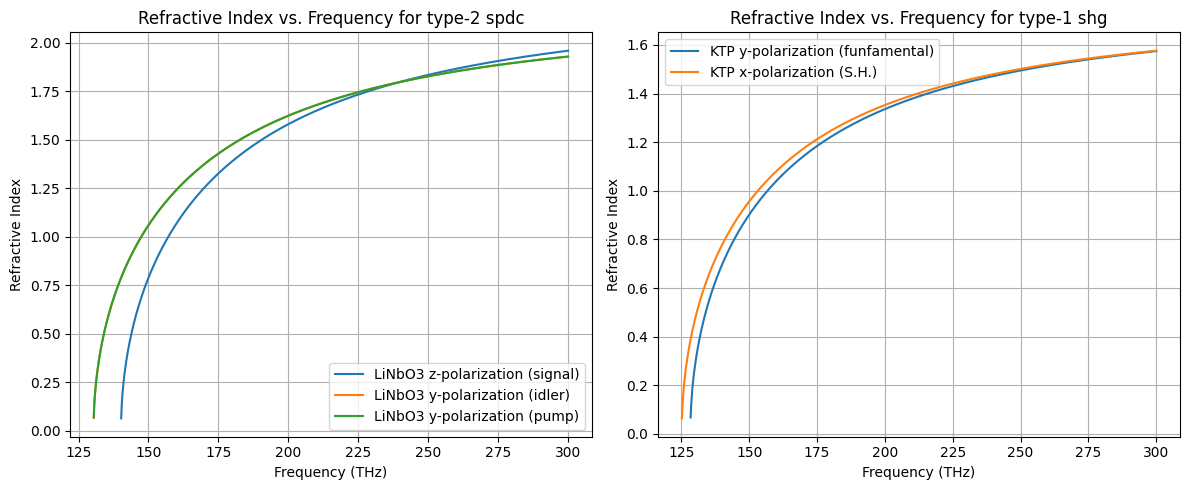

In [5]:
# Prepare the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Wavelength domain representation
axs[0].plot(omega1*1e-12, crystal_spdc.n_s(omega1), label='LiNbO3 z-polarization (signal)')
axs[0].plot(omega1*1e-12, crystal_spdc.n_i(omega1), label='LiNbO3 y-polarization (idler)')
axs[0].plot(omega1*1e-12, crystal_spdc.n_p(omega1), label='LiNbO3 y-polarization (pump)')
axs[0].set_xlabel('Frequency (THz)')
axs[0].set_ylabel('Refractive Index')
axs[0].set_title('Refractive Index vs. Frequency for type-2 spdc')
axs[0].grid(True)
axs[0].legend()

# Frequency domain representation
axs[1].plot(omega1*1e-12, crystal_shg.n_f(omega1), label='KTP y-polarization (funfamental)')
axs[1].plot(omega1*1e-12, crystal_shg.n_sh(omega1), label='KTP x-polarization (S.H.)')
axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Refractive Index')
axs[1].set_title('Refractive Index vs. Frequency for type-1 shg')
axs[1].grid(True)
axs[1].legend()


plt.tight_layout()
plt.show()

## 3. Crystal Configuration Examples
The crystal configuration offers four choices: 
- **normal** for a standard bulk crystal
- **ppln** which auto-calculates domain width for phase matching unless specified
- **random** for a randomly generated nonlinear profile
- **custom** for a user-defined profile with specific domain values and boundaries. 

Additionally, crystal length can be directly set or randomly determined within given maximum and minimum bounds.

domain_width/2 = 1.6299133e-05
domain_width/5 = 6.519653e-06
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z.
domain_width/2 = 1.6299133e-05
domain_width/5 = 6.519653e-06
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z.
domain_width/2 = 1.6299133e-05
domain_width/5 = 6.519653e-06
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z.
domain_width/2 = 1.6299133e-05
domain_width/5 = 6.519653e-06
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z.


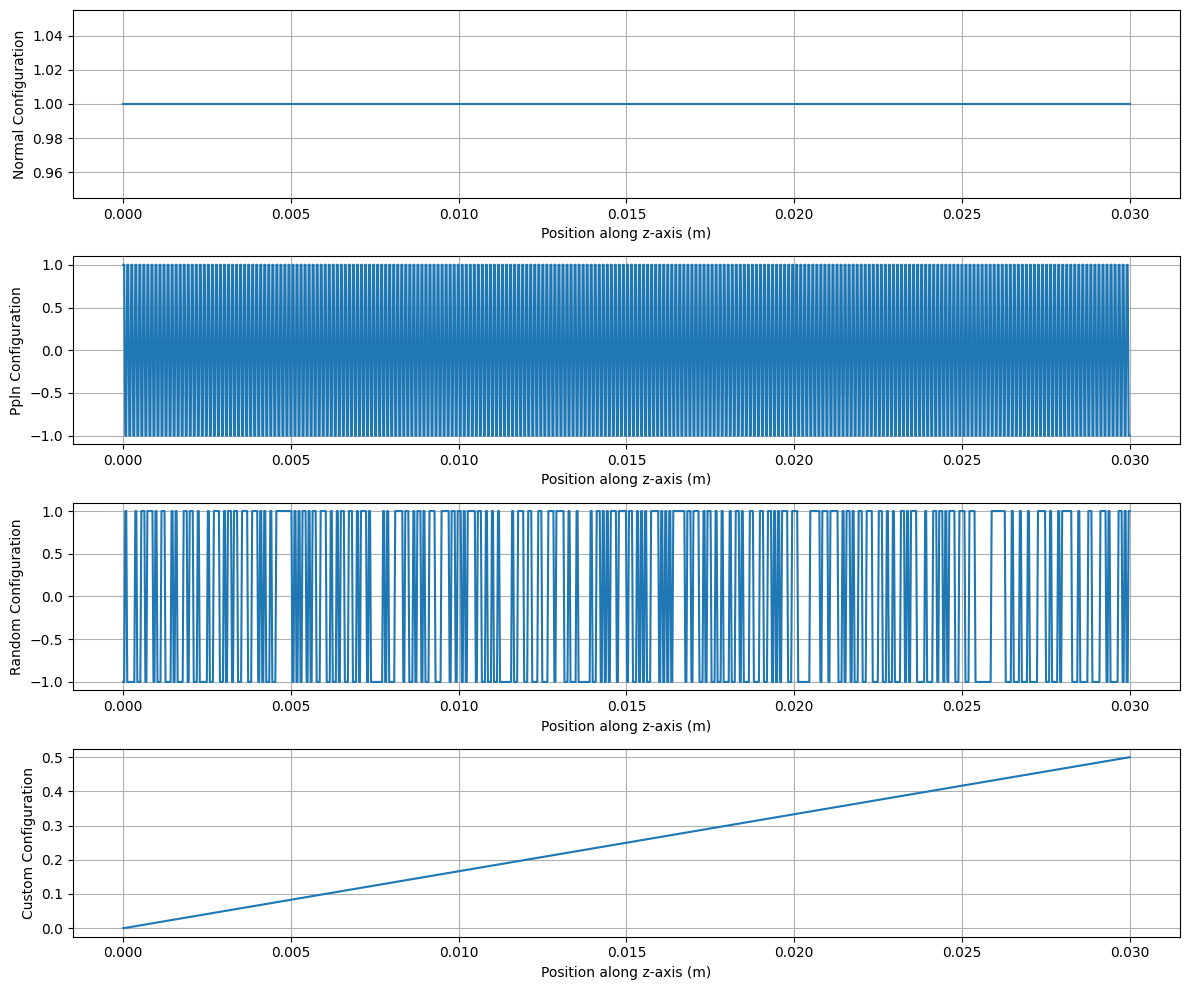

In [6]:
# Example configurations for SPDC process in a KTP crystal
configurations = ['normal', 'ppln', 'random', 'custom']
length = 30e-3  # Crystal length in meters for all configurations
nz = 1000

# Initialize and plot nonlinear profiles for each configuration
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

for i, config in enumerate(configurations):
    if config == 'custom':
        # Custom domain values and bounds for demonstration
        domain_values = np.linspace(0, length/np.max(length), nz)  # Example domain values
        domain_bounds = (0, length)  # Example domain bounds
        crystal = Crystal(config, 'KTP', nz, 'spdc', 1064e-9, signal='z', idler='y', pump='y', length=length, domain_values_custom=domain_values, domain_bounds_custom=domain_bounds)
    else:
        crystal = Crystal(config, 'KTP', nz, 'spdc', 1064e-9, signal='z', idler='y', pump='y', length=length)

    parameters = np.array(crystal.poling_function(np.array(crystal.domain_values)), dtype=np.float32)[:len(crystal.z)]
    axs[i].plot(np.linspace(0, length, nz), parameters)
    axs[i].set_xlabel('Position along z-axis (m)')
    axs[i].set_ylabel(f'{config.capitalize()} Configuration')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## 4. Fourier Series Coefficients and Poling Expansion
The `fourier_series_coeff_numpy` and `poling_expansion` functions are typically used to analyze and design the poling pattern of nonlinear crystals. `fourier_series_coeff_numpy` computes the Fourier series coefficients of a given nonlinear profile, which helps in understanding the frequency components of the poling pattern. `poling_expansion`, on the other hand, utilizes these coefficients to reconstruct or approximate the nonlinear profile, enabling the design of custom poling patterns for specific phase-matching conditions.

In [14]:
# Assuming fourier_series_coeff_numpy and poling_expansion are defined

# Compute Fourier series coefficients for a given nonlinear profile (example with custom configuration)
parameters_spdc = np.array(crystal_spdc.poling_function(np.array(crystal_spdc.domain_values)), dtype=np.float32)[:len(crystal_shg.z)]
coefficients = crystal_spdc.fourier_series_coeff_numpy(parameters_spdc)

# Use coefficients to reconstruct or approximate the nonlinear profile
reconstructed_profile = crystal_spdc.poling_expansion(coefficients, crystal_spdc.domain_width, np.linspace(0, length, nz))

# Plotting original vs. reconstructed profile
plt.figure(figsize=(10, 6))
#plt.plot(np.abs(coefficients), label='Original Profile')
#plt.plot(np.linspace(0, length, nz), reconstructed_profile, '--', label='Reconstructed Profile')
plt.title('Original vs. Reconstructed Nonlinear Profile')
plt.xlabel('Position along z-axis (m)')
plt.ylabel('Nonlinear Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 